Paddle: 10 x 2 px @ 8,9,10 px & 73,74,75 vertical (counting from 0)
        paddles can go out of the picture.
        paddle form 0.45882353 0.5764706  0.48235294
        
Ball:   3 x 4 px \
         should be \
             XX \
            XXXX \
           XXXXXX \
            XXXX \
             XX \
        ball form:             0.827451   0.4392157 \
                    0.5529412  0.91764706 0.44313726 \
                    0.57254905 0.7490196 \
                    0.57254905 0.7490196 \

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import random


In [2]:
val_data = np.load('val_data20kFEB23.npy')

[[0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 ...
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.56078434 0.56078434 0.56078434 ... 0.56078434 0.56078434 0.56078434]]


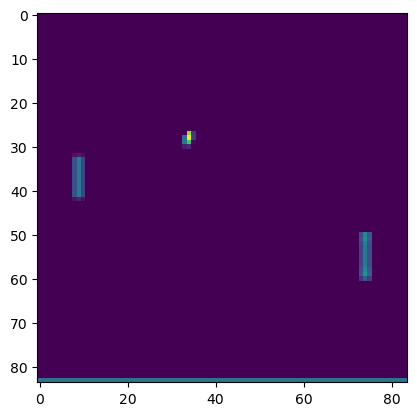

In [3]:
print(val_data[170])
plt.imshow(val_data[170])
plt.show()

In [4]:
print(val_data[170][26])

[0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648]


In [5]:
#*******************
# Generates data from input
# :p1 left upper corner left paddle [-10, 84]
# :p2 left upper corner right paddle [-10, 84]
# :xBall, yBall coordinates ball center [1, 82] x [2, 82] (should not touch walls)
# return sample image Y x X (first coordinate is y)
#
#********************

def sample(p1, p2, xBall, yBall):
    assert -10 <= p1 and p1  <= 84, 'p1 out of range'
    assert -10 <= p2 and p2  <= 84, 'p2 out of range'
    assert 1 <= xBall and xBall <= 82, 'xBall out of range'
    assert 1 <= yBall and yBall <= 82, 'yBall out of range'
    
    arr = np.zeros((84, 84))

    for i in range(p1, p1 + 10):
        if i < 0 or i > 83: continue
        arr[i][8:11] = 1
        
    for i in range(p2, p2 + 10):
        if i < 0 or i > 83: continue
        arr[i][73:76] = 1
    
    for i in range(yBall-2, yBall+2):
        arr[i][xBall-1:xBall+2] = 1
    
    return arr


In [6]:
def makeValid(p1, p2, xBall, yBall):
    if p1 < -10:
        p1 = -9 #we dont want it to be the same again
    elif p1 > 84:
        p1 = 83
    if p2 < -10:
        p1 = -9
    elif p2 > 84:
        p1 = 83
        
    if xBall < 1:
        xBall = 2
    elif xBall > 82:
        xBall = 81
        
    if yBall < 1:
        yBall = 2
    elif yBall > 82:
        yBall = 81
    
    return p1, p2, xBall, yBall

In [7]:
#*******************
# Generates data from input
# :p1 left upper corner left paddle [-10, 84]
# :p2 left upper corner right paddle [-10, 84]
# :xBall, yBall coordinates ball center [1, 82] x [2, 82] (should not touch walls)
# return sample buffer 4x Y x X (first coordinate is y) Bilder abfolgend mit 1 px Unterschied
#
#********************
def sampleBuffer():
    
    arr = np.empty((4,84,84))
    p1 = random.randrange(-10,84,1)
    p2 = random.randrange(-10,84,1)
    xBall = random.randrange(1,82,1)
    yBall = random.randrange(1,82,1)
    
    for i in range(4):
        arr[i] = sample(p1, p2, xBall, yBall)
        p1 += random.randrange(-2, 2, 2)
        p2 += random.randrange(-2, 2, 2)
        xBall += random.randrange(-2, 2, 2)
        yBall += random.randrange(-2, 2, 2)
        
        p1, p2, xBall, yBall = makeValid(p1, p2, xBall, yBall)
    
    return arr

In [8]:
def makeValidUPDoWN(p1, p2, xBall, yBall, p1change, p2change, xBallchange, yBallchange, stepsize):
    
    if p1 <= -10 + stepsize:
        p1change = 1 #we dont want it to be the same again
    elif p1 >= 84- stepsize:
        p1change = -1
    if p2 <= -10 + stepsize:
        p2change = 1
    elif p2 >= 84- stepsize:
        p2change = -1
        
    if xBall <= 1 + stepsize:
        xBallchange = 1
    elif xBall >= 82 - stepsize:
        xBallchange = -1
        
    if yBall <= 1 + stepsize:
        yBallchange = 1
    elif yBall >= 82- stepsize:
        yBallchange = -1
    
    return p1change, p2change, xBallchange, yBallchange

In [9]:
#*******************
# Generates data from input
# :p1 left upper corner left paddle [-10, 84]
# :p2 left upper corner right paddle [-10, 84]
# :xBall, yBall coordinates ball center [1, 82] x [2, 82] (should not touch walls)
# return sample buffer 4x Y x X (first coordinate is y) Bilder abfolgend mit 1 px Unterschied
#
#********************
def sampleBufferDirection(p1, p2, xBall, yBall):
    
    arr = np.empty((4,84,84))
    stepsize = 2
    
    p1change = random.randrange(-1,2,2) #upper bound is not included. Lower is
    p2change = random.randrange(-1,2,2)
    xBallchange = random.randrange(-1,2,2)
    yBallchange = random.randrange(-1,2,2)
    
    for i in range(4):
        #print(f"1 xBall: {xBall},xBallchange: {xBallchange}, yBallchange: {yBallchange}, yBall: {yBall}")
        p1change, p2change, xBallchange, yBallchange = makeValidUPDoWN(p1, p2, xBall, yBall, p1change, p2change, xBallchange, yBallchange, stepsize)
        #print(f"2 xBall: {xBall},xBallchange: {xBallchange}, yBallchange: {yBallchange}, yBall: {yBall}")
        #print(" ")
        
        arr[i] = sample(p1, p2, xBall, yBall)
        p1 += p1change * stepsize
        p2 += p2change * stepsize
        xBall += xBallchange * stepsize
        yBall += yBallchange * stepsize
        
        
    return arr

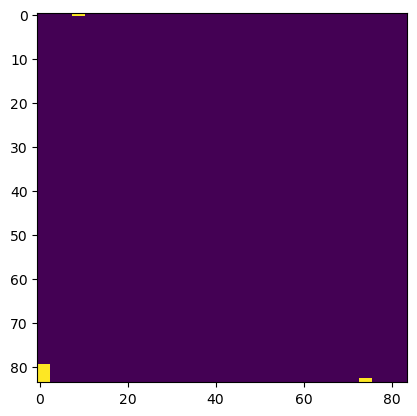

In [10]:
plt.imshow(sample(-9, 83, 1,82))
plt.show()

In [11]:

p1 = random.randrange(-10,84,1)
p2 = random.randrange(-10,84,1)
xBall = random.randrange(1,82,1)
yBall = random.randrange(1,82,1)

arr = sampleBufferDirection(p1, p2, xBall, yBall)


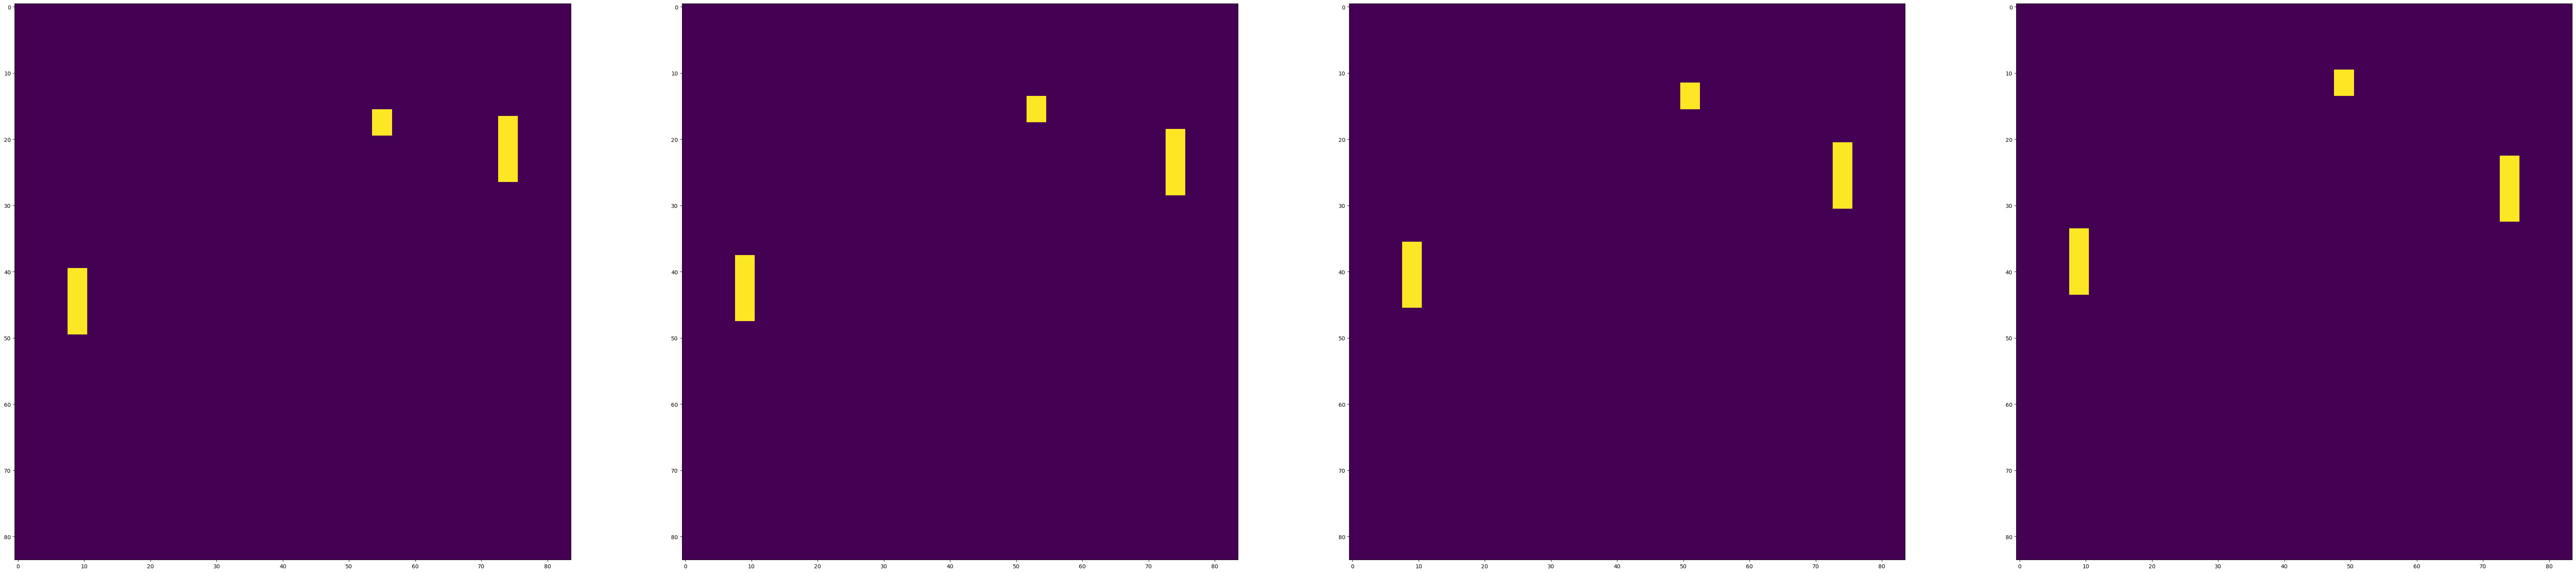

In [12]:
fig = plt.figure(figsize=(84, 84))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(arr[i-1])
plt.show()

Generate Training and validation data

In [13]:
train_length = 30000 #100k for single images 30k for 4Buffer
val_length = 8000    #20k for single images 8k for 8 Buffer
train_data = []
val_data = []

In [14]:
print("training data")
for i in range(train_length):
    p1 = random.randrange(-10,84,1)
    p2 = random.randrange(-10,84,1)
    xBall = random.randrange(1,82,1)
    yBall = random.randrange(1,82,1)
    #train_data.append(sample(p1, p2, xBall, yBall))
    train_data.append(sampleBufferDirection(p1, p2, xBall, yBall))
    if i % 1000 == 0: print(i)
        
print("validation data")
for i in range(val_length):
    p1 = random.randrange(-10,84,1)
    p2 = random.randrange(-10,84,1)
    xBall = random.randrange(1,82,1)
    yBall = random.randrange(1,82,1)
    #val_data.append(sample(p1, p2, xBall, yBall))
    val_data.append(sampleBufferDirection(p1, p2, xBall, yBall))
    if i % 1000 == 0: print(i)

training data
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
validation data
0
1000
2000
3000
4000
5000
6000
7000


30000
8000


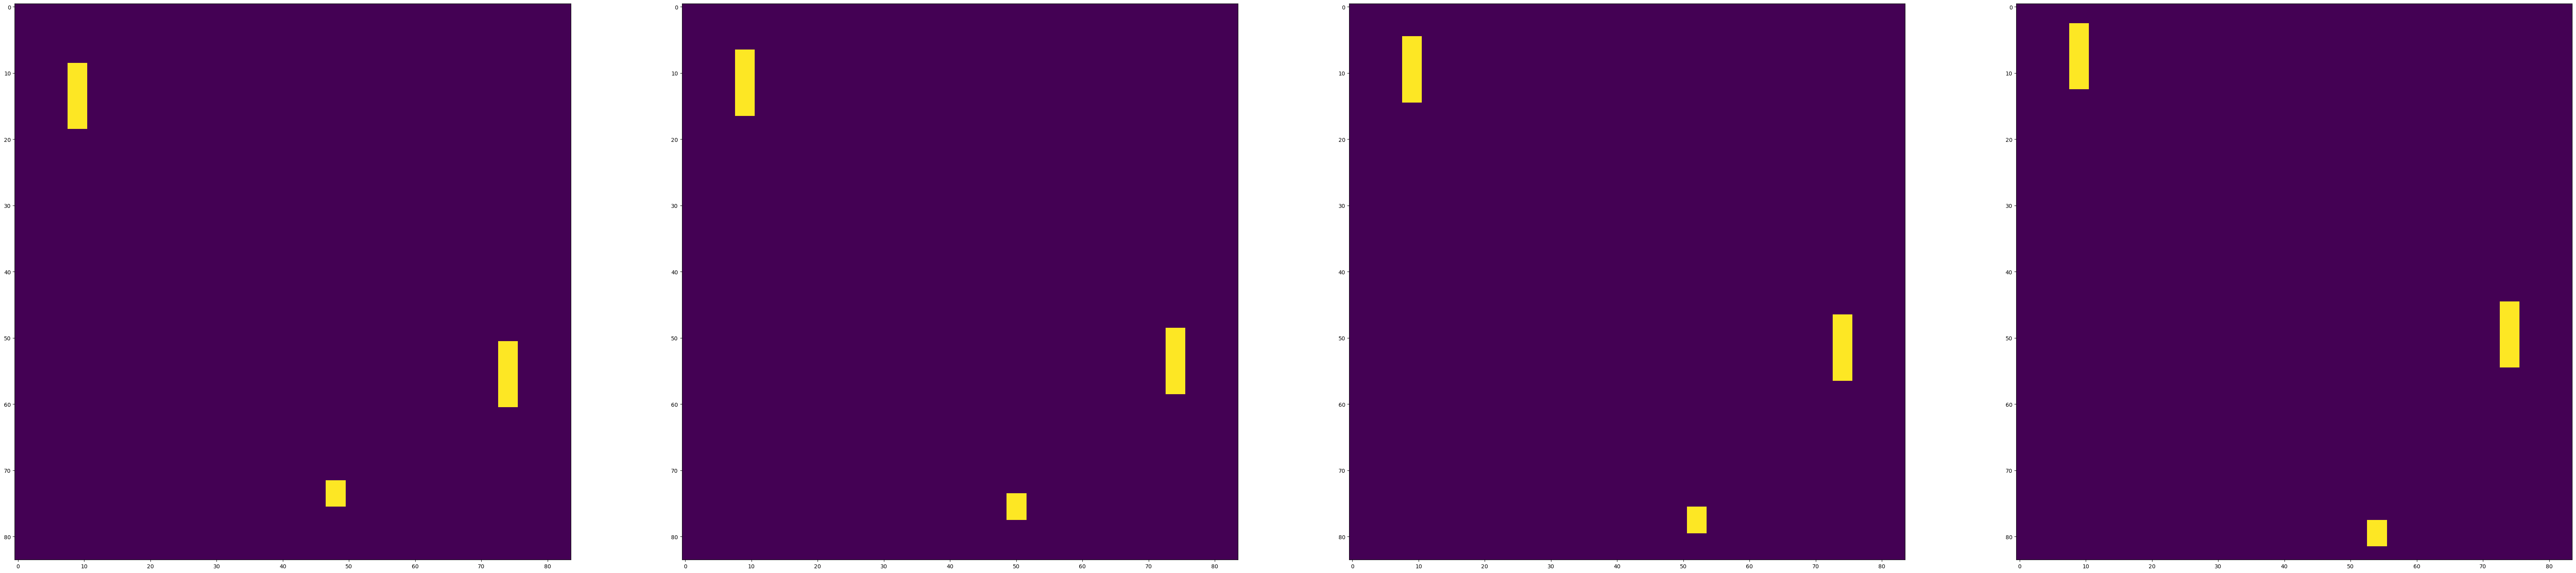

In [15]:
print(len(train_data))
print(len(val_data))
#plt.imshow(train_data[6])
#plt.show()
fig = plt.figure(figsize=(84, 84))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_data[6][i-1])
plt.show()

Convert to float 32 from double64

In [16]:
tain_data_np = np.asarray(train_data)
val_data_np = np.asarray(val_data)

In [17]:
val_data_np.dtype
tain_data_np.dtype

dtype('float64')

In [18]:
train_data_np2 = tain_data_np.astype(dtype=np.float32)
val_data_np2 = val_data_np.astype(dtype=np.float32)
print(val_data_np2.dtype)
print(train_data_np2.dtype)

float32
float32


In [19]:
np.save( "train_data100kBufferMAR29", train_data_np2)
np.save( "val_data20kBufferMAR29", val_data_np2)